In [ ]:
import pandas_datareader as pd

In [ ]:
import datetime as dt

In [ ]:
import yfinance as yf
data = yf.download('ITC.NS', start='2018-06-01', end='2023-06-01')

[*********************100%***********************]  1 of 1 completed


In [ ]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-25,436.950012,442.450012,434.799988,441.149994,438.448669,18204464
2023-05-26,443.399994,444.750000,439.500000,443.600006,440.883667,12995706
2023-05-29,445.000000,451.799988,444.100006,449.100006,446.350006,19826254
2023-05-30,441.000000,451.450012,441.000000,449.899994,449.899994,18900002
2023-05-31,449.299988,452.000000,442.450012,445.500000,445.500000,14272292


In [ ]:
data1 = data.reset_index()['Close']

In [ ]:
data1.shape

(1234,)

In [ ]:
import matplotlib.pyplot as plt

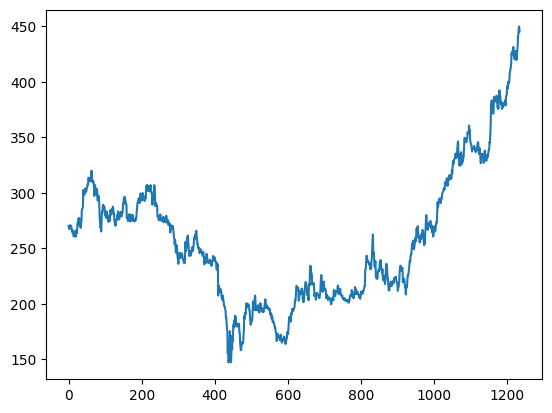

In [ ]:
plt.plot(data1)

In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data1 = scaler.fit_transform(np.array(data1).reshape(-1,1))

In [ ]:
data1

array([[0.40541885],
       [0.40194943],
       [0.39732365],
       ...,
       [0.99735672],
       [1.        ],
       [0.98546177]])

In [ ]:
###DATA COLLECTION DONE

In [ ]:
training_size = int(len(data1)*0.65)
test_size = len(data1) - training_size
print(training_size)
print(test_size)

802
432


In [ ]:
train_data,test_data = data1[0:training_size, :1], data1[training_size:len(data1),:1]

In [ ]:
len(train_data),len(test_data)

(802, 432)

In [ ]:
def create_dataset(dataset, time_step =  1):
  dataX, dataY = [],[]
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX),np.array(dataY)

In [ ]:
time_step = 100
X_train, Y_train = create_dataset(train_data,time_step)
X_test, Y_test = create_dataset(test_data,time_step)

In [ ]:
print(X_train)

[[0.40541885 0.40194943 0.39732365 ... 0.46423262 0.46357175 0.4415992 ]
 [0.40194943 0.39732365 0.40690565 ... 0.46357175 0.4415992  0.45019   ]
 [0.39732365 0.40690565 0.40905333 ... 0.4415992  0.45019    0.43515617]
 ...
 [0.24054189 0.21576079 0.21609118 ... 0.19329259 0.19544026 0.18949284]
 [0.21576079 0.21609118 0.21989098 ... 0.19544026 0.18949284 0.19378819]
 [0.21609118 0.21989098 0.21807369 ... 0.18949284 0.19378819 0.20072692]]


In [ ]:
print(X_test.shape),print(Y_test.shape)

(331, 100)
(331,)


(None, None)

In [ ]:
###DATA PREPROCESSING DONE, NOW WE IMPLEMENT LSTM

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1))) #this is first line of line 57
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer = 'adam')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,Y_train,validation_data=(X_test, Y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
11/11 [==============================] - 10s 348ms/step - loss: 0.0206 - val_loss: 0.0495
Epoch 2/100
11/11 [==============================] - 2s 225ms/step - loss: 0.0051 - val_loss: 0.0054
Epoch 3/100
11/11 [==============================] - 3s 271ms/step - loss: 0.0031 - val_loss: 0.0182
Epoch 4/100
11/11 [==============================] - 3s 279ms/step - loss: 0.0016 - val_loss: 0.0064
Epoch 5/100
11/11 [==============================] - 2s 223ms/step - loss: 0.0013 - val_loss: 0.0019
Epoch 6/100
11/11 [==============================] - 2s 223ms/step - loss: 0.0012 - val_loss: 0.0023
Epoch 7/100
11/11 [==============================] - 2s 224ms/step - loss: 0.0011 - val_loss: 0.0029
Epoch 8/100
11/11 [==============================] - 3s 290ms/step - loss: 0.0011 - val_loss: 0.0028
Epoch 9/100
11/11 [==============================] - 3s 257ms/step - loss: 0.0011 - val_loss: 0.0027
Epoch 10/100
11/11 [==============================] - 2s 224ms/step - loss: 0.0010 - val_l

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

11/11 [==============================] - 0s 41ms/step


In [ ]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))

231.7216668078038

In [ ]:
math.sqrt(mean_squared_error(Y_test,test_predict))

325.68914965118074

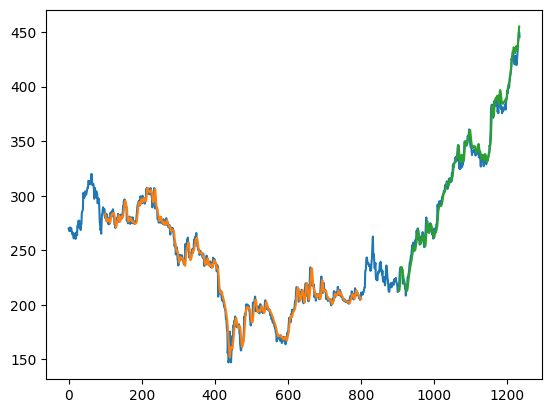

In [ ]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(data1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [ ]:
##NOW WE PREDICT FUTURE 30 DAYS
len(test_data)

432

In [ ]:
x_input = test_data[332:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [ ]:
temp_input

[0.6074674039689489,
 0.5939203820419703,
 0.6152321690471185,
 0.6205187232126697,
 0.630431163524914,
 0.6150669012078467,
 0.6097802462077384,
 0.6033372205055139,
 0.5997026388907796,
 0.6044936920421871,
 0.6112671525883979,
 0.6191970846712818,
 0.6109367177444116,
 0.6190319176665673,
 0.6294399598275124,
 0.633404976286233,
 0.6343961799836346,
 0.6566991706861842,
 0.6527341542274636,
 0.6776805228473461,
 0.7075830107887935,
 0.7644143755794837,
 0.7711878361256943,
 0.7802742397452516,
 0.7467371701890699,
 0.7543366674279675,
 0.7500413169598179,
 0.7404593114915599,
 0.7498761499551034,
 0.7903519478967675,
 0.7763093241210881,
 0.7774656948232042,
 0.7802742397452516,
 0.7824219149793263,
 0.7764744911258028,
 0.7817611461259111,
 0.7941516965162165,
 0.7858913295893462,
 0.7763093241210881,
 0.7581365168819736,
 0.7647448104234698,
 0.7543366674279675,
 0.7853957277406454,
 0.795968936906305,
 0.8100115606819844,
 0.7938212616722302,
 0.7954733350576042,
 0.7811002764379

In [ ]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1)) #reshaping the model for lstm
        yhat = model.predict(x_input, verbose=0) #prediction
        print(yhat[0])
        temp_input.extend(yhat[0].tolist()) #yHat added to list, at 101th position, same done till 130th in loop
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[1.0219877]
101
1 day input [0.59392038 0.61523217 0.62051872 0.63043116 0.6150669  0.60978025
 0.60333722 0.59970264 0.60449369 0.61126715 0.61919708 0.61093672
 0.61903192 0.62943996 0.63340498 0.63439618 0.65669917 0.65273415
 0.67768052 0.70758301 0.76441438 0.77118784 0.78027424 0.74673717
 0.75433667 0.75004132 0.74045931 0.74987615 0.79035195 0.77630932
 0.77746569 0.78027424 0.78242191 0.77647449 0.78176115 0.7941517
 0.78589133 0.77630932 0.75813652 0.76474481 0.75433667 0.78539573
 0.79596894 0.81001156 0.79382126 0.79547334 0.78110028 0.76804896
 0.76705765 0.77383121 0.75433667 0.76507514 0.75896255 0.76160583
 0.77118784 0.76474481 0.76970103 0.76821412 0.77812656 0.78060467
 0.76540558 0.79018668 0.79332566 0.79729058 0.82190651 0.81381131
 0.82058487 0.8356187  0.83016688 0.83099291 0.8361143  0.86238231
 0.86386921 0.87328595 0.87559889 0.88798944 0.91954401 0.91590953
 0.92483066 0.91640513 0.93011732 0.93903855 0.91376175 0.91888324
 0.90252767 0.90269294 0.92697834 0

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

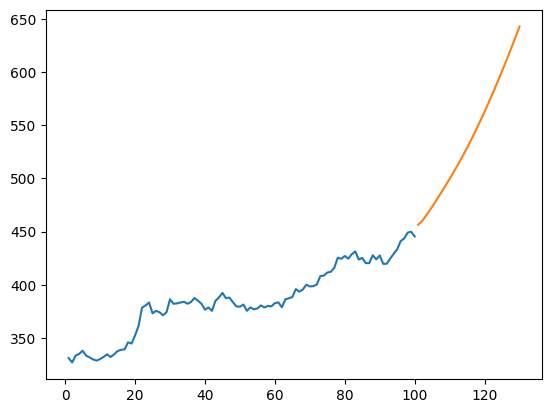

In [ ]:
plt.plot(day_new,scaler.inverse_transform(data1[1134:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))